### Llama 3 70B with test set
In this experiment, we create a test set and run Llama 3 70B on it.

In [1]:
from groq import Groq
import pandas as pd
import time

In [2]:
client = Groq(
    api_key="",
)

**Create the test set**

In [3]:
df = pd.read_csv("data/text-classification-train.csv")
df

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [4]:
df_excl = df[200:] # Exclude the test set
test_set = pd.DataFrame()

In [5]:
fields = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']
for field in fields:
    field_subset = df_excl[df_excl[field] == 1].head(200)
    test_set = pd.concat([test_set, field_subset])

In [6]:
test_set

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
202,203,An Integrated Decision and Control Theoretic S...,This paper considers the problem of autonomo...,1,0,0,0,0,0
204,205,Learning Transferable Architectures for Scalab...,Developing neural network image classificati...,1,0,0,0,0,0
205,206,Fast Multi-frame Stereo Scene Flow with Motion...,We propose a new multi-frame method for effi...,1,0,0,0,0,0
207,208,Weak Form of Stokes-Dirac Structures and Geome...,We present the mixed Galerkin discretization...,1,0,0,0,0,0
210,211,An Effective Way to Improve YouTube-8M Classif...,Large-scale datasets have played a significa...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
16977,16978,Explicit solutions to utility maximization pro...,We study the problem of utility maximization...,0,0,0,0,0,1
17183,17184,Atomic Swaptions: Cryptocurrency Derivatives,The atomic swap protocol allows for the exch...,0,0,0,0,0,1
17245,17246,Portfolio diversification and model uncertaint...,This paper is concerned with a multi-asset m...,0,0,0,0,0,1
17324,17325,Econometric modelling and forecasting of intra...,In the following paper we analyse the ID$_3$...,0,0,0,0,0,1


This likely includes duplicates, so we can drop the duplicates while still ensuring that each category has 200 items.

In [11]:
test_set = test_set.drop_duplicates()

In [12]:
test_set

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1009,The Generalized Cross Validation Filter,Generalized cross validation (GCV) is one of...,1,0,0,1,0,0
1,735,A Theory of Complex Stochastic Systems with Tw...,Many complex systems share two characteristi...,0,1,0,0,0,0
2,205,Learning Transferable Architectures for Scalab...,Developing neural network image classificati...,1,0,0,0,0,0
3,349,Ensemble Estimation of Mutual Information,We derive the mean squared error convergence...,1,0,1,1,0,0
4,5563,Variable domain N-linked glycosylation and neg...,Autoreactive B cells have a central role in ...,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1193,5005,Hybrid Sterility Can Only be Primary When Acti...,Parental gametes unite to form a zygote that...,0,0,0,0,1,0
1194,356,A Combinatorial Approach to the Opposite Bi-Fr...,"In this paper, we present a combinatorial ap...",0,0,1,0,0,0
1196,893,On perpetuities with gamma-like tails,An infinite convergent sum of independent an...,0,0,1,0,0,0
1197,10216,Trading algorithms with learning in latent alp...,Alpha signals for statistical arbitrage stra...,0,0,0,1,0,1


In [13]:
test_set.reset_index(drop=True, inplace=True)

In [14]:
test_set = test_set.sample(frac=1).reset_index(drop=True)
test_set

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,475,Selecting optimal minimum spanning trees that ...,Choi et. al (2011) introduced a minimum span...,1,0,1,0,0,0
1,11242,A Markov Chain Model for the Cure Rate of Non-...,A Markov-chain model is developed for the pu...,0,0,0,1,0,1
2,649,On Popov's formula involving the Von Mangoldt ...,We offer a generalization of a formula of Po...,0,0,1,0,0,0
3,15325,Retirement spending and biological age,We solve a lifecycle model in which the cons...,0,0,0,0,0,1
4,1529,Social Network based Short-Term Stock Trading ...,This paper proposes a novel adaptive algorit...,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1049,429,On generalizations of $p$-sets and their appli...,"The $p$-set, which is in a simple analytic f...",1,0,1,0,0,0
1050,830,A Comprehensive Study of Ly$α$ Emission in the...,We present an exhaustive census of Lyman alp...,0,1,0,0,0,0
1051,222,"SPIRou Input Catalog: Activity, Rotation and M...",Based on optical high-resolution spectra obt...,0,1,0,0,0,0
1052,663,Multiscale Modeling of Shock Wave Localization...,"Shock wave interactions with defects, such a...",0,1,0,0,0,0


Now, the test set is shuffled and made so that each category has at least 200 items. Of course, because a document can belong to multiple categories, some categories (like CS and Statistics) have much more than 200--in this case, 300+. But the fact that at least 200 of each class is present allows us to better see if the model predicts fields like Quantitative Finance and Biology better.

**Define the labeling functions**

In [77]:
def label_abstract_cs(x):
    prompt = f'''I will paste an abstract from a research article. I want you
            to respond "1" if the abstract comes from a paper in the computer science field, and "0"
            if it doesn't or if you are not sure. Do not include anything else in your response; just
            the number. Please classify this abstract: {x}'''
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="llama3-70b-8192",
    )
    time.sleep(5)
    print(int(chat_completion.choices[0].message.content))
    return int(chat_completion.choices[0].message.content)

def label_abstract_physics(x):
    prompt = f'''I will paste an abstract from a research article. I want you
            to respond "1" if the abstract comes from a paper in the physics field, and "0"
            if it doesn't or if you are not sure. Do not include anything else in your response; just
            the number. Please classify this abstract: {x}'''
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="llama3-70b-8192",
    )
    time.sleep(5)
    print(int(chat_completion.choices[0].message.content))
    return int(chat_completion.choices[0].message.content)

def label_abstract_math(x):
    prompt = f'''I will paste an abstract from a research article. I want you
            to respond "1" if the abstract comes from a paper in the mathematics field, and "0"
            if it doesn't or if you are not sure. Do not include anything else in your response; just
            the number. Please classify this abstract: {x}'''
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="llama3-70b-8192",
    )
    time.sleep(5)
    print(int(chat_completion.choices[0].message.content))
    return int(chat_completion.choices[0].message.content)

def label_abstract_statistics(x):
    prompt = f'''I will paste an abstract from a research article. I want you
            to respond "1" if the abstract comes from a paper in the statistics field, and "0"
            if it doesn't or if you are not sure. Do not include anything else in your response; just
            the number. Please classify this abstract: {x}'''
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="llama3-70b-8192",
    )
    time.sleep(5)
    print(int(chat_completion.choices[0].message.content))
    return int(chat_completion.choices[0].message.content)

def label_abstract_qb(x):
    prompt = f'''I will paste an abstract from a research article. I want you
            to respond "1" if the abstract comes from a paper in the quantitative biology field, and "0"
            if it doesn't or if you are not sure. Do not include anything else in your response; just
            the number. Please classify this abstract: {x}'''
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="llama3-70b-8192",
    )
    time.sleep(5)
    print(int(chat_completion.choices[0].message.content))
    return int(chat_completion.choices[0].message.content)

def label_abstract_qf(x):
    prompt = f'''I will paste an abstract from a research article. I want you
            to respond "1" if the abstract comes from a paper in the quantitative finance field, and "0"
            if it doesn't or if you are not sure. Do not include anything else in your response; just
            the number. Please classify this abstract: {x}'''
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="llama3-70b-8192",
    )
    time.sleep(5)
    print(int(chat_completion.choices[0].message.content))
    return int(chat_completion.choices[0].message.content)

**Quantitative Finance**

In [20]:
# Quantitative finance
test_set['Llama3_70B_QF'][:300] = test_set['ABSTRACT'][:300].apply(label_abstract_qf)

0
1
0
1
1
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
1
0
1
1
1
1
0
1
0
1
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
1
1
1
0
0
0
0
0
1
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
1
1
0
0
0


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\3227349620.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_set['Llama3_70B_QF'][:300] = test_set['ABSTRACT'][:300].apply(label_abstract_qf)
C:\Users\aharve\AppData\Local\Temp\ipyker

In [21]:
# Quantitative finance
test_set['Llama3_70B_QF'][300:600] = test_set['ABSTRACT'][300:600].apply(label_abstract_qf)

1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
0
0
0


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\3504868269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_QF'][300:600] = test_set['ABSTRACT'][300:600].apply(label_abstract_qf)


In [22]:
# Quantitative finance
test_set['Llama3_70B_QF'][600:1054] = test_set['ABSTRACT'][600:1054].apply(label_abstract_qf)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
1
1
1
0
1
0
0
0
1
0
1
0
1
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
1
1
1
0
1
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
1
0
1
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
1
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
1
0
0
0
1
0
1
1
0
0
1
1
0
0
1
0
0
1
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
1
0
1
0
0
1
0
0
0
0
0
0
1
1
0
0
0
0
1
1
0
0
0
0
0
0
0
1


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\720354160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_QF'][600:1054] = test_set['ABSTRACT'][600:1054].apply(label_abstract_qf)


In [23]:
test_set.to_csv("test1.csv")

<Axes: >

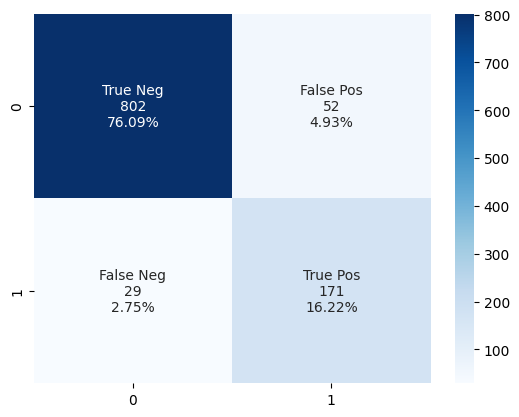

In [25]:
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(test_set['Quantitative Finance'], test_set['Llama3_70B_QF'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [26]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Accuracy: the percent of correctly classified data
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.9231499051233396

**Quantitative Biology**

In [29]:
# Quantitative biology
test_set['Llama3_70B_QB'][:300] = test_set['ABSTRACT'][:300].apply(label_abstract_qb)

1
0
0
0
0
0
0
0
0
1
1
0
0
1
1
0
1
1
0
1
1
1
1
0
1
0
0
0
1
0
0
0


InternalServerError: Error code: 503 - {'error': {'message': 'Service Unavailable', 'type': 'internal_server_error'}}

In [31]:
# Quantitative biology
test_set['Llama3_70B_QB'][33:300] = test_set['ABSTRACT'][33:300].apply(label_abstract_qb)

1
1
1
1
0
0
0


InternalServerError: Error code: 503 - {'error': {'message': 'Service Unavailable', 'type': 'internal_server_error'}}

In [33]:
# Quantitative biology
test_set['Llama3_70B_QB'][40:300] = test_set['ABSTRACT'][40:300].apply(label_abstract_qb)

0
1
0
1
1
0
0
0
0
0
1
1
1
0
0
1
0
0
0
0
0
0
1
1
0
0
0
1
1
0
1
1
0
0
1
1
1
1
0
1
0
0
0
1
0
1
0
1
1
1
1
1
0
1
1
1
0
0
1
0
1
0
1
1
0
0
1
1
1
1
0
1
0
1
0
0
0
0
1
1
0
0
1
1
1
0
0
1
0
1
1
0
1
0
0
1
1
0
0
1
1
0
0
1
0
1
0
1
1
1
0
0
0
0
0
0
1
0
1
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
0
1
1
0
1
1
0
0
0
1
1
1
0
1
0
0
1
0
0
1
0
1
1
1
0
0
0
1
1
0
0
1
1
1
0
1
0
0
0
0
1
0
1
0
1
1
0
0
1
1
0
1
0
0
1
1
0
1
1
0
0
0
0
1
1


InternalServerError: Error code: 503 - {'error': {'message': 'Service Unavailable', 'type': 'internal_server_error'}}

In [34]:
# Quantitative biology
test_set['Llama3_70B_QB'][261:300] = test_set['ABSTRACT'][261:300].apply(label_abstract_qb)

0
0
1
0
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
0
0
0
0
1
1
0
1
1
1
0
0
1
0
0
1
1
1
1
1


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\2027228256.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_set['Llama3_70B_QB'][261:300] = test_set['ABSTRACT'][261:300].apply(label_abstract_qb)
C:\Users\aharve\AppData\Local\Temp\

In [ ]:
# Quantitative biology
test_set['Llama3_70B_QB'][300:450] = test_set['ABSTRACT'][300:450].apply(label_abstract_qb)

In [36]:
len(test_set[test_set['Computer Science'] == 1])

276

In [37]:
len(test_set[test_set['Mathematics'] == 1])

204

In [38]:
len(test_set[test_set['Physics'] == 1])

201

In [39]:
len(test_set[test_set['Statistics'] == 1])

249

In [40]:
len(test_set[test_set['Quantitative Finance'] == 1])

200

In [41]:
len(test_set[test_set['Quantitative Biology'] == 1])

200

In [43]:
# Quantitative biology
test_set['Llama3_70B_QB'][450:600] = test_set['ABSTRACT'][450:600].apply(label_abstract_qb)

0
0
0
0
1
1
0
1
0
1
0
0
0
1
1
1
0
1
0
1
1
0
1
0
0
0
1
0
1
0
0
0
1
0
1
0
1
0
1
0
0
0
1
0
1
0
1
0
1
0
1
1
1
0
0
1
0
1
0
0
0
1
0
0
1
1
1
1
0
1
1
1
1
1
0
0
0
0
1
0
1
1
1
0
1
0
0
0
0
1
1
1
0
1
0
1
0
1
0
0
1
1
1
0
0
0
1
1
0
1
0
1
0
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
0
0
1
0
0
1
0
1
1
0
1
0
0
0
1
0
0
1
1
1
0
1


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\3738037418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_QB'][450:600] = test_set['ABSTRACT'][450:600].apply(label_abstract_qb)


In [45]:
# Quantitative biology
test_set['Llama3_70B_QB'][600:750] = test_set['ABSTRACT'][600:750].apply(label_abstract_qb)

0
1
0
1
0
1
0
0
0
0
0
1
1
0
0
1
0
0
0
0
1
1
0
0
0
0
0
1
1
0
1
0
1
0
1
0
1
0
1
0
0
0
1
0
1
0
1
1
1
0
0
0
1
1
0
1
0
0
0
1
1
0
1
1
0
0
1
1
0
0
0
1
1
1
1
0
0
0
1
1
1
1
1
0
0
1
0
0
1
0
1
0
1
1
0
0
1
0
0
1
1
0
0
1
1
0
0
1
1
1
0
0
1
1
0
1
1
1
0
0
1
1
0
0
0
1
1
0
0
0
0
1
0
1
1
0
0
1
0
0
1
1
0
0
0
1
1
1
1
0


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\1847402632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_QB'][600:750] = test_set['ABSTRACT'][600:750].apply(label_abstract_qb)


In [46]:
# Quantitative biology
test_set['Llama3_70B_QB'][750:900] = test_set['ABSTRACT'][750:900].apply(label_abstract_qb)

0
0
0
0
0
1
1
0
1
0
1
0
1
1
1
1
1
0
0
1
1
1
0
0
0
0
0
1
1
0
1
0
0
1
0
1
1
0
0
1
0
1
1
0
0
0
1
1
0
0
0
1
0
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
0
1
0
0
0
1
0
1
0
1
0
1
0
0
0
1
0
0
1
1
1
0
0
0
1
1
0
1
1
1
0
0
0
1
1
0
0
0
0
1
1
0
1
1
1
0
1
0
1
1
0
0
1
0
0
1
0
1
1
0
0
1
1
1
1
0
0
0
1
0
0
0
1
1
1
0
0
0
1
0
1


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\211357104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_QB'][750:900] = test_set['ABSTRACT'][750:900].apply(label_abstract_qb)


In [47]:
# Quantitative biology
test_set['Llama3_70B_QB'][900:1054] = test_set['ABSTRACT'][900:1054].apply(label_abstract_qb)

1
1
1
1
1
0
0
1
0
0
1
0
0
1
1
0
0
0
1
1
0
0
1
0
1
0
1
1
0
0
1
1
1
1
1
0
0
1
0
1
0
0
0
0
1
1
1
1
0
1
1
1
0
0
1
1
0
1
1
0
1
0
0
0
1
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
1
1
0
0
1
0
1
1
1
0
0
0
1
0
0
0
0
0
1
0
1
1
1
0
0
0
0
0
1
0
1
0
0
1
1
1
0
0
1
0
0
1
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
1
1


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\3148520750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_QB'][900:1054] = test_set['ABSTRACT'][900:1054].apply(label_abstract_qb)


In [49]:
test_set.to_csv("qf_qb.csv")

<Axes: >

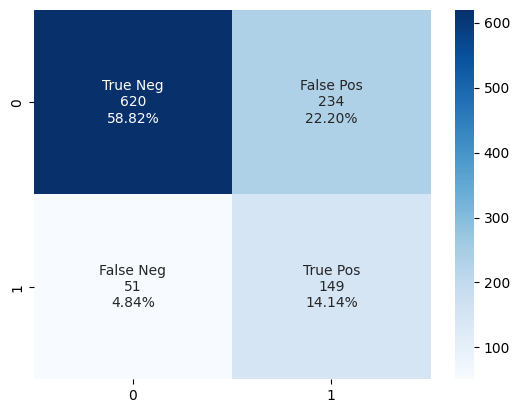

In [54]:
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(test_set['Quantitative Biology'], test_set['Llama3_70B_QB'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [55]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Accuracy: the percent of correctly classified data
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.7296015180265655

Note, this accuracy isn't correct because it didn't record the first 300+.

**Physics**

In [56]:
test_set['Llama3_70B_Physics'] = 0

In [58]:
test_set['Llama3_70B_Physics'][:300] = test_set['ABSTRACT'][:300].apply(label_abstract_physics)

0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
0
1
1
1
1
0
1
1
0
0
0
0
0
1
1
0
0
1
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
1
1
0
1
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
1
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
1
0
0
1
1
0
1
0
0
0
0
1
1
0
1
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
1
0
1
1
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
1
0


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\2650138442.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_set['Llama3_70B_Physics'][:300] = test_set['ABSTRACT'][:300].apply(label_abstract_physics)
C:\Users\aharve\AppData\Local\T

In [59]:
test_set['Llama3_70B_Physics'][300:600] = test_set['ABSTRACT'][300:600].apply(label_abstract_physics)

1
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
1
0
0
0
1
1
0
0
1
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
1
0
0
1
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
0
0
1
1
1
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
1
1
0
0
0
0
1
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
1
0
1
1
1
1
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
1
0
1
1
0
1
0
0
1
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\96372047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_Physics'][300:600] = test_set['ABSTRACT'][300:600].apply(label_abstract_physics)


In [60]:
test_set['Llama3_70B_Physics'][600:900] = test_set['ABSTRACT'][600:900].apply(label_abstract_physics)

1
1
0
1
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
1
0
0
1
0
0
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
1
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
1
1
0
1
1
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
1
1
0
0
0
1
0
1
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
1
0
1
1
0
0
0
1
1
0
1
0
0
1
1
0
1
0
0
1
0
0
0
0
0
1
0
1
0
1
1
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
1
0
1
0
0
1
1
1
0
1
0
0
1
0
1
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\2498726470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_Physics'][600:900] = test_set['ABSTRACT'][600:900].apply(label_abstract_physics)


In [61]:
test_set['Llama3_70B_Physics'][900:1054] = test_set['ABSTRACT'][900:1054].apply(label_abstract_physics)

0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
1
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
0
0
0
0
0
0
1
1
1
0
0
0
1
1
0
0
1
0
0
0
0
1
1
0
0
1
0
0
1
0
1
1
0


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\1776067907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_Physics'][900:1054] = test_set['ABSTRACT'][900:1054].apply(label_abstract_physics)


<Axes: >

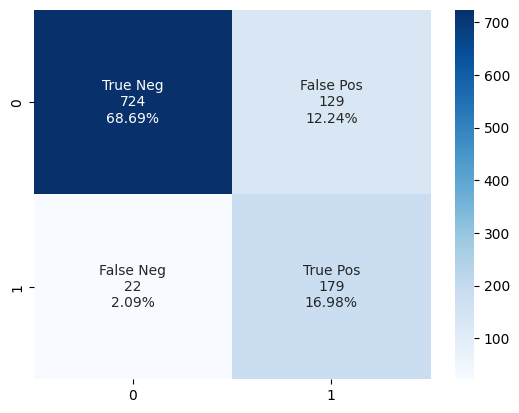

In [62]:
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(test_set['Physics'], test_set['Llama3_70B_Physics'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [63]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Accuracy: the percent of correctly classified data
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.8567362428842504

In [64]:
test_set.to_csv("physics_70b.csv")

**Computer Science**

In [65]:
test_set['Llama3_70B_CS'] = 0

In [67]:
test_set['Llama3_70B_CS'][:300] = test_set['ABSTRACT'][:300].apply(label_abstract_cs)

1
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
1
1
0
0
1
0
0
1
1
1
1
0
0
0
0
1
1
1
1
0
0
1
0
1
0
0
0
0
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
0
0
1
0
0
1
1
0
0
0
0
1
0
1
1
1
1
0
1
0
1
1
0
0
1
0
0
0
1
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
1
0
1
1
1
1
0
1
0
0
0
1
1
1
1
1
0
1
0
0
0
0
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
1
0
1
1
1
1
1
0
0
1
1
0
1
1
0
1
0
0
1
0
1
1
0
1
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
0
1
1
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
1
0
1
1
0
1
1
1
1
0
0
1
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
1
0
1
0
1
0
0
0
0
1
1
0
0
1
1
1
1
1
1
0
1
0
0
0
1
0
0
1
1
1
1
1
0
0
1
1
1
1
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
1


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\2209002680.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_set['Llama3_70B_CS'][:300] = test_set['ABSTRACT'][:300].apply(label_abstract_cs)
C:\Users\aharve\AppData\Local\Temp\ipyker

In [68]:
test_set['Llama3_70B_CS'][300:600] = test_set['ABSTRACT'][300:600].apply(label_abstract_cs)

1
1
1
0
0
0
1
1
0
0
1
1
1
1
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
1
1
1
0
0
1
0
1
1
1
0
1
1
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
1
0
0
1
0
1
1
0
1
1
1
1
1
0
1
0
1
0
0
1
1
0
1
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
1
1
1
0
1
1
0
1
0
0
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
0
1
1
1
0
0
1
0
0
1
1
1
0
1
1
0
1
1
0
1
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
0
0
1
1
1
0
0
0
1
1
1
0
1
1
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
1
0
1
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
1
1
0
1
1
0
0
0
1
0
0
0
1
1
1
0
0
0
1
1
1


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\3667339969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_CS'][300:600] = test_set['ABSTRACT'][300:600].apply(label_abstract_cs)


In [69]:
test_set['Llama3_70B_CS'][600:900] = test_set['ABSTRACT'][600:900].apply(label_abstract_cs)

0
0
1
0
1
1
0
1
1
1
0
1
1
1
0
0
1
1
0
1
0
1
0
0
1
0
0
1
0
0
0
1
1
1
1
0
0
0
0
1
0
1
0
1
0
0
0
0
1
1
0
1
0
0
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
0
1
1
0
1
0
0
1
0
1
1
0
0
0
0
0
1
1
1
1
0
0
1
0
0
1
1
1
0
0
0
1
1
0
0
1
0
0
0
1
0
1
1
1
0
0
0
0
1
0
0
1
1
0
0
1
0
0
0
0
0
1
1
1
0
0
1
0
0
1
1
1
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
0
0
1
0
1
0
1
0
1
0
0
0
0
1
1
1
0
1
1
1
1
0
0
1
0
1
1
0
0
1
0
1
0
0
0
1
1
1
1
0
0
1
0
0
1
1
0
1
1
0
0
1
1
0
0
0
1
0
0
0
0
1
0
0
0
1
1
0
1
1
0
0
0
0
1
0
0
1
1
0
0
1
1
0
0
1
0
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
1
1
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
1
1
0
0
1
1
0
0
1
1
0
1
0
1
0
1
1
1
0
0
0
0
1
0
1


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\2902981292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_CS'][600:900] = test_set['ABSTRACT'][600:900].apply(label_abstract_cs)


In [70]:
test_set['Llama3_70B_CS'][900:1054] = test_set['ABSTRACT'][900:1054].apply(label_abstract_cs)

0
0
1
1
0
1
1
0
0
1
1
1
1
0
0
1
0
0
1
0
0
1
1
0
1
1
1
1
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
0
1
0
1
1
0
0
1
0
1
1
1
0
0
1
1
1
1
1
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
1
1
0
0
0
0
1
0
0
1
0
1
1
0
0
0
0
0
0
0
0
1
1
1
0
0
1
0
0
1
0
1
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
1
1
1
0
0
0
0


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\2996294219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_CS'][900:1054] = test_set['ABSTRACT'][900:1054].apply(label_abstract_cs)


<Axes: >

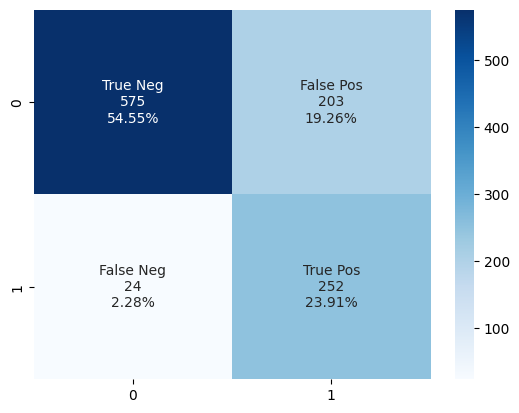

In [73]:
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(test_set['Computer Science'], test_set['Llama3_70B_CS'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [74]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Accuracy: the percent of correctly classified data
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.784629981024668

This confounds me. On a sample of 200 (the first 200, in fact), the model got a whopping 89.5% accuracy. Here, it gets a measly 78%. I'm honestly not sure why we see such a huge discrepancy. It would do us well to see where the false positives are coming from. My hypothesis is that the higher incidence of QB and QF articles confuse the model, and most of the mis-classified ones will be from those categories.

In [99]:
test_set[(test_set["Computer Science"] == 0) & (test_set["Llama3_70B_CS"] == 1)]["Quantitative Finance"].value_counts()

Quantitative Finance
0    158
1     45
Name: count, dtype: int64

In [100]:
test_set[(test_set["Computer Science"] == 0) & (test_set["Llama3_70B_CS"] == 1)]["Quantitative Biology"].value_counts()

Quantitative Biology
0    134
1     69
Name: count, dtype: int64

In [103]:
test_set[(test_set["Computer Science"] == 0) & (test_set["Llama3_70B_CS"] == 1)]["Statistics"].value_counts()

Statistics
0    109
1     94
Name: count, dtype: int64

In [75]:
test_set.to_csv("Mostfull.csv")

**Mathematics**

In [76]:
test_set['Llama3_70B_Math'] = 0

In [78]:
test_set['Llama3_70B_Math'][:300] = test_set['ABSTRACT'][:300].apply(label_abstract_math)

1
1
1
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
0
0
1
0
1
0
0
0
0
0
0
1
1
0
1
1
1
1
1
1
1
1
0
1
1
0
1
0
0
0
1
1
1
0
0
1
1
1
0
1
0
1
1
0
1
1
0
0
1
1
0
1
0
0
0
1
0
1
1
1
0
0
1
1
1
0
1
0
0
1
0
0
1
0
1
0
1
0
0
1
1
1
1
1
1
0
0
0
1
0
0
0
0
1
0
1
0
0
1
1
0
0
1
0
1
0
0
1
1
0
1
0
1
1
0
0
1
1
1
0
1
1
0
0
0
1
0
0
1
0
0
1
1
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
1
0
1
0
0
1
1
0
1
1
1
0
0
0
0
0
0
1
1
0
1
0
1
1
1
1
1
0
1
1
0
0
1
0
1
0
0
0
0
0
1
1
1
1
0
1
1
0
1
0
0
0
0
1
1
0
1
1
1
1
1
1
0
0
0
0
0
1
0
1
1
0
1
0
0
0
1
0
0
0
1
0
1
1
0
1
0
1
0
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
0
1
1
1
0
0
0
1
1
1
1
0
0
1
1
0
0
0
1
1
1
1
1
0


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\2689660287.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_set['Llama3_70B_Math'][:300] = test_set['ABSTRACT'][:300].apply(label_abstract_math)
C:\Users\aharve\AppData\Local\Temp\ip

In [79]:
test_set['Llama3_70B_Math'][300:600] = test_set['ABSTRACT'][300:600].apply(label_abstract_math)

1
1
0
0
1
0
1
1
1
1
0
0
1
1
0
0
1
0
1
1
0
1
1
1
1
1
0
1
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
1
0
0
1
0
1
1
0
1
1
1
0
1
1
1
0
0
1
0
1
0
1
1
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
1
0
0
1
1
0
0
0
0
1
0
0
0
1
1
0
0
0
1
1
0
1
0
1
0
1
1
0
1
1
0
1
0
1
1
1
1
1
0
0
1
0
1
1
1
1
0
0
0
1
0
1
0
1
1
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
1
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
0
0
1
1
0
1
0
1
1
1
0
0
0
0
0
0
0
1
0
0
0
1
0
1
1
0
1
1
0
1
1
0
1
1
1
0
0
1
1
1
0
1
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
1
1
0
1
0
0
0
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
0
1
0
0
0
0
1
0
0
1
0
1
0
1
0
0
0
0
1
1
0
1
1
0
0
0
0


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\2721935706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_Math'][300:600] = test_set['ABSTRACT'][300:600].apply(label_abstract_math)


In [80]:
test_set['Llama3_70B_Math'][600:900] = test_set['ABSTRACT'][600:900].apply(label_abstract_math)

0
1
0
0
0
0
1
0
1
0
0
1
1
0
0
1
0
0
0
0
1
0
1
1
0
1
1
0
1
1
0
0
0
0
0
0
0
1
1
0
1
0
1
1
1
1
1
1
0
1
0
0
1
1
0
1
0
1
1
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
1
1
0
1
0
1
1
1
1
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
1
1
1
1
1
0
1
0
0
0
0
0
1
0
1
0
0
1
0
1
1
0
0
1
1
0
0
1
0
0
0
1
1
0
1
0
0
0
0
1
1
1
1
1
0
1
1
0
0
1
0
0
0
1
0
1
1
0
0
0
1
0
1
0
1
1
0
1
0
0
0
0
0
0
1
1
0
0
1
0
0
1
1
1
1
1
1
1
0
0
1
0
0
1
0
0
0
1
0
1
1
0
1
1
0
1
1
0
0
0
1
1
1
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
1
1
0
1
0
0
0
1
0
1
1
0
1
0
0
0
0
0
0
1
1
0
0
1
0
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
0
0
0
0
0
0
1
1
1
0
1
1
0
0
0
1
0
0
0
0
0
1
0
0
1
1
0
1


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\1682961113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_Math'][600:900] = test_set['ABSTRACT'][600:900].apply(label_abstract_math)


In [81]:
test_set['Llama3_70B_Math'][900:1054] = test_set['ABSTRACT'][900:1054].apply(label_abstract_math)

1
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
1
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
1
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
1
0
0
1
0
0
0
1
1
0
1
1
0
1
1
1
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
1
0
1
1
0
1
0
0
1
0
1
1
0
1
0
0
0
1
1
1
1
0
0
0
0
0
1
1
0
1
0
1
0
0
0
1


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\2290932966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_Math'][900:1054] = test_set['ABSTRACT'][900:1054].apply(label_abstract_math)


In [82]:
test_set.to_csv("cs_70b.csv")

<Axes: >

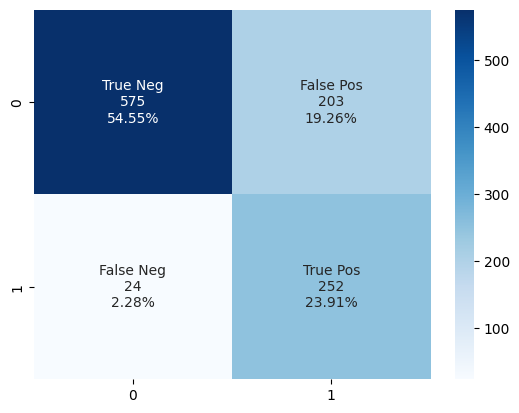

In [83]:
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(test_set['Computer Science'], test_set['Llama3_70B_CS'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [84]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Accuracy: the percent of correctly classified data
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.784629981024668

**Statistics**

In [86]:
test_set['Llama3_70B_Statistics'] = 0

In [87]:
test_set['Llama3_70B_Statistics'][:300] = test_set['ABSTRACT'][:300].apply(label_abstract_statistics)

1
1
0
0
1
0
0
1
0
0
1
0
0
0
0
1
1
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
1
1
0
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
0
1
0
1
1
0
0
1
0
1
1
0
0
0
1
0
0
1
1
1
0
0
1
1
1
0
1
0
0
0
0
0
1
1
1
0
0
0
0
0
1
1
1
1
1
0
1
0
0
0
0
1
0
0
1
1
1
0
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
0
0
0
1
1
1
0
1
1
1
0
0
0
0
1
1
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
1
0
1
1
0
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
1
1
1
1
0
0
0
0
0
1
0
0
0
0
1
1
1
0
1
1
1
1
1
0
0
1
1
0
1
0
0
1
1
0
0
0
0
1
0
0
0
1
1
1
1
1
0
1
1
0
1
1
0
1
1
0
1
0
0
0
0
1
1
1
0
0
0
0
0
1
0
0
1
0
0
1
1
1
1
0
1
1
0
0
1
0
0
1
1
1
1
1
1
0
0
0
0
0
1
1
1
0
0


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\210133677.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_set['Llama3_70B_Statistics'][:300] = test_set['ABSTRACT'][:300].apply(label_abstract_statistics)
C:\Users\aharve\AppData\Lo

In [89]:
test_set['Llama3_70B_Statistics'][300:600] = test_set['ABSTRACT'][300:600].apply(label_abstract_statistics)

1
0
1
0
0
0
0
1
0
1
0
1
1
0
1
0
1
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
1
0
0
0
1
1
1
0
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
0
1
1
1
1
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
1
0
0
1
0
0
1
0
1
1
1
0
0
0
0
0
0
1
0
0
0
1
1
1
0
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
1
1
1
1
1
0
0
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
1
1
0
1
0
1
1
1
0
1
1
0
0
0
0
1
0
0
0
1
0
1
1
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\2528866850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_Statistics'][300:600] = test_set['ABSTRACT'][300:600].apply(label_abstract_statistics)


In [90]:
test_set['Llama3_70B_Statistics'][600:900] = test_set['ABSTRACT'][600:900].apply(label_abstract_statistics)

0
0
1
0
1
0
1
1
1
1
0
1
1
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
1
1
0
0
1
1
1
0
1
0
1
1
0
0
1
0
0
0
1
0
0
1
0
0
1
1
0
0
0
0
0
0
0
1
1
1
1
1
0
1
1
0
1
1
1
0
0
0
0
1
1
1
0
0
0
1
0
0
0
1
0
1
0
0
1
1
1
0
1
0
1
1
1
0
0
0
1
0
0
0
0
0
1
1
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
1
1
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
1
0
1
0
0
1
1
0
0
1
1
1
0
0
1
0
0
0
1
1
1
1
0
0
1
1
0
0
1
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
0
0
0
1
0
0
0
1
1
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
1
0
1
1
1
0
0
0
1
0
1
0
0
0
1
1
0
1
1
1
1
1
1
0
0
0
1
1
1
1
0
1
1
1
1


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\1088410231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_Statistics'][600:900] = test_set['ABSTRACT'][600:900].apply(label_abstract_statistics)


In [91]:
test_set['Llama3_70B_Statistics'][900:1054] = test_set['ABSTRACT'][900:1054].apply(label_abstract_statistics)

1
0
0
0
0
0
1
1
1
1
0
1
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
1
1
0
1
0
1
0
0
1
0
0
0
0
0
1
1
1
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
1
0
1
0
1
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
1
0
1
1
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
1
1
1
1
1
1
0
1
0
0
0
0
1
0
1
1
0
1
1
0
1
0
1
1
0
1
1
0
0
1


C:\Users\aharve\AppData\Local\Temp\ipykernel_13764\1456993914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Llama3_70B_Statistics'][900:1054] = test_set['ABSTRACT'][900:1054].apply(label_abstract_statistics)


<Axes: >

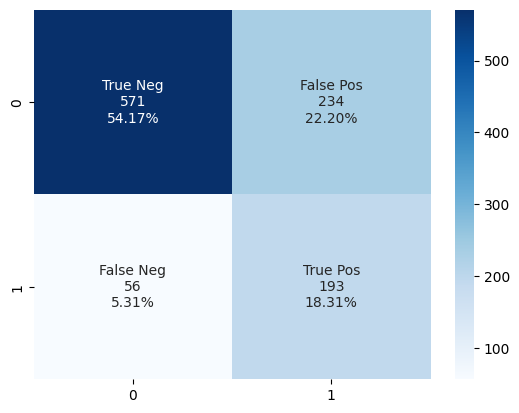

In [93]:
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(test_set['Statistics'], test_set['Llama3_70B_Statistics'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [94]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Accuracy: the percent of correctly classified data
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.7248576850094877